### Dates and Times
A special type of categorical variable are those that instead of taking traditional labels, like color (blue, red), or city (London, Manchester), take dates as values. For example, date of birth ('29-08-1987', '12-01-2012'), or time of application ('2016-Dec', '2013-March').

Datetime variables can contain dates only, or time only, or date and time.

Typically, we would never work with a date variable as a categorical variable, for a variety of reasons:

- Date variables usually contain a huge number of individual categories, which will expand the feature space dramatically
- Date variables allow us to capture much more information from the dataset if preprocessed in the right way
In addition, often, date variables will contain dates that were not present in the dataset that we used to train the machine learning algorithm. In fact, will contain dates placed in the future respect to the dates present in the dataset we used to train. Therefore, the machine learning model will not know what to do with them, because it never saw them while being trained.

I will cover different was of pre-processing/engineering date variables in the section "Engineering date variables".

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('../datasets/loan.csv')
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [5]:
data.dtypes

customer_id                 int64
disbursed_amount          float64
interest                  float64
market                     object
employment                 object
time_employed              object
householder                object
income                    float64
date_issued                object
target                      int64
loan_purpose               object
number_open_accounts      float64
date_last_payment          object
number_credit_lines_12    float64
dtype: object

In [10]:
# now let's parse the dates, currently coded as strings, into datetime format
# this will allow us to make some analysis afterwards


data['date_issued'] = pd.to_datetime(data['date_issued'])

data['date_last_payment'] = pd.to_datetime(data['date_last_payment'])

In [11]:
data.dtypes

customer_id                        int64
disbursed_amount                 float64
interest                         float64
market                            object
employment                        object
time_employed                     object
householder                       object
income                           float64
date_issued               datetime64[ns]
target                             int64
loan_purpose                      object
number_open_accounts             float64
date_last_payment         datetime64[ns]
number_credit_lines_12           float64
dtype: object

## dateframe groupby

- groupby()

- get_group

- groupby([ , ])

In [14]:
dt = pd.DataFrame({'Age': [50, 60, 100, 10, 2, 30], 'Sports': ['Tennis', "Baseball", "Skating", "Movie", 'Skiing', "Napping"]}, index= [3, 4, 9, 1, 2, 10])

In [15]:
dt

,Age,Sports
3,50,Tennis
4,60,Baseball
9,100,Skating
1,10,Movie
2,2,Skiing
10,30,Napping


In [23]:
sports = dt.groupby('Sports')
sports.first()

,Age
Sports,
Baseball,60
Movie,10
Napping,30
Skating,100
Skiing,2
Tennis,50


In [25]:
sports.get_group('Skating')

,Age,Sports
9,100,Skating


In [29]:
group = dt.groupby(["Age", "Sports"])
group.first()

,
Age,Sports
2,Skiing
10,Movie
30,Napping
50,Tennis
60,Baseball
100,Skating


In [ ]:
-- end --

In [30]:
# let's see how much money Lending Club has disbursed
# (i.e., lent) over the years to the different risk
# markets (grade variable)

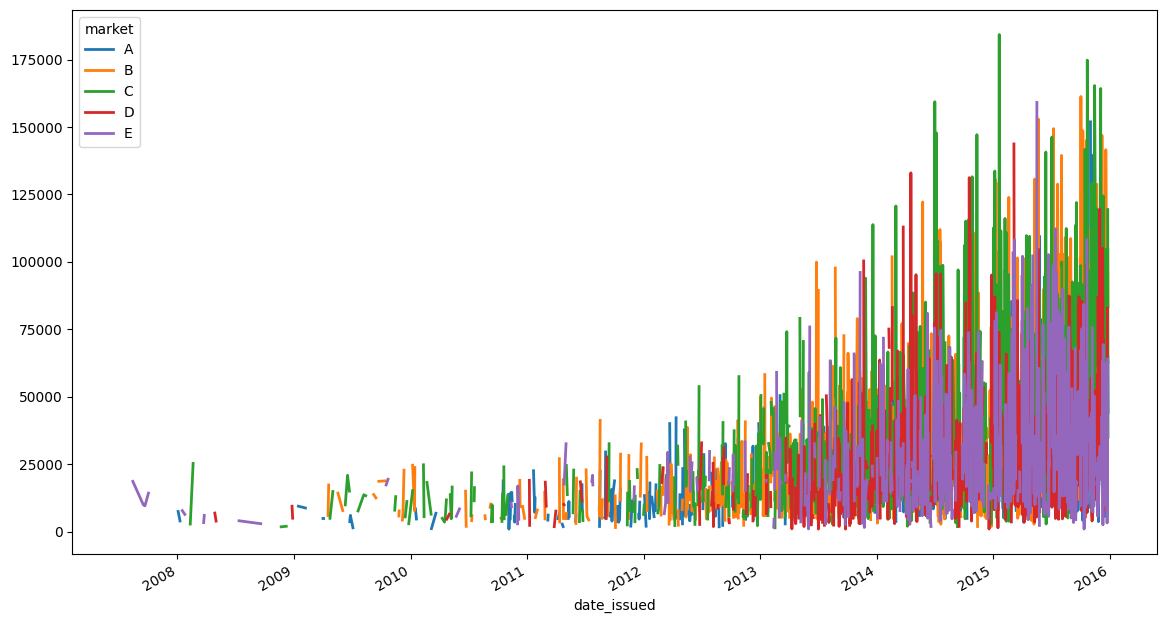

In [33]:
# market
# disbursed_amount
# date_issued

fig = data.groupby(["date_issued", 'market'])['disbursed_amount'].sum().unstack().plot(figsize=(14, 8), linewidth=2)